# 01. Topic Model Korean

## 1. Topic Modeling with Sklearn

* 영화 리뷰 데이터를 이용하여 topic modeling을 학습

### Topic Modeling이란?
<https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/>

* 토픽모델링은 **텍스트 형태로 되어 있는 다수의 문서들로부터 공통적으로 내재되어 있는 주제들을 추출하기 위한 방법론**이다.
* 토픽모델링의 기본적인 가정은, 저자들이 문서를 작성할 때 먼저 특정한 주제들을 정하고 나서 그러한 주제들로부터 문장을 구성한다는 것이다. 따라서 문서를 구성하는 **단어들은 그 주제들로부터 파생**되어진 것으로 볼 수 있으며, 토픽모델링은 **문서와 단어들에 대해 통계적인 추론을 수행하여 본래의 주제들을 찾아내는 방법**이라고 할 수 있다.
* 이러한 작업을 하기 위해서는 **먼저 자연어로 기술되어 있는 문서들에 대해 형태소 분석**을 함으로써 문장들을 **개별 단어로 분리**해야 한다.

---

* 토픽모델링의 가장 대표적인 알고리즘은 LDA(Latent Dirichlet Allocation)로 알려져 있다.
* LDA는 Blei et al. (2003)에 의해 제안된 알고리즘으로, 앞서 설명한 바와 같이, 확률기법을 기반으로 하여 문서의 토픽 분포를 추론한다.
* LDA에서 토픽은 주제를 의미하는 용어로 사용되며, **각 문서들이 특정한 주제에 속할 확률분포와 주제로부터 특정 단어들이 파생되어 나올 확률분포**가 주어졌을 때, 이 두 확률분포를 **조합하여 각 문서들에 들어가는 단어들의 확률분포를 계산**해낸다.

* 아래 그림에서 θ는 문서들이 각 주제들에 속할 확률분포를 나타내며 디리클레분포의 매개변수인 α에 의해 결정된다.
* 그림에서 N은 특정 문서에 속한 단어의 집합이며, M은 전체 문서의 집합을 나타낸다. **z는 문서 내의 단어들이 주제들에 속할 확률분포**를 나타내며, 이는 θ에 의한 다항분포로 선택된다.
* **β는 각 주제가 특정 단어를 생성할 확률**을 나타내는 확률분포이며, **결국 z와 β에 의해 실제 문서들의 단어분포인 w가 결정된다.**
* 이 모형에서 w만이 실제로 문서들을 통해 주어진 분포이고 **나머지는 모두 잠재변수**이다.
* LDA 알고리즘에서는 주어진 문서와 토픽들의 사전확률 분포인 α와 토픽 내에서 단어의 사전확률분포인 β의 파라미터 값을 활용해 반복적인 시뮬레이션을 통해 z와 θ를 추정한다.

![image.png](image.png)

![image.png](topic.png)

## 2. 다음 영화 리뷰로 text classification 진행

### 1) 다음무비에서 추출한 영화 리뷰 불러오기

In [1]:
import csv
text = []
y = []

with open('movie_data_new.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[0]) > 10: #review 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가

In [2]:
print('리뷰 수:', len(text))
print('리뷰영화:', set(y))

리뷰 수: 12445
리뷰영화: {'택시운전사', '코코', '곤지암', '인피니티 워', '범죄도시', '라라랜드', '신과함께'}


In [3]:
text[:10]

['헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...',
 '개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고 단적인 신념이 얼마나 부질없는지 보셔라',
 '정말 지루할틈없이 넘잘만들었다 역시 대단하다',
 '마지막에 누구한테 연락한거지? 궁금',
 '다음 편이 궁굼해지네요^^',
 '안잼있는사람 있음???????????',
 '잘 만들었다! 지루할 틈이 없네...',
 '이제는 지겨워서 못보겠다',
 '롱턱 타노스의  장갑이 참 맘에 듬.  아이언 맨과 토르 닥터만 생고생하고..  가디언즈 오브 갤럭시 들 때문에  손해가 크다고 봄  들짐승 하고 칡뿌리 같은 캐릭이  재미를 더해줄줄 알았으나  아쉬움 . 분노의 상징 헐크가 겁을 먹다니..로키의 초반 출연뿐이 서운하지만  본 영화에 이어질 내용에 적합하지 않은지 서두에  죽는부분으로 마무리 됨은 심섬한 충격임 .  다음편에 헬라가 다시 나올까?',
 '와~~~~~진짜 개쪄는 인피니티워!!몇번을 봐도 개지린다.너무잼있다.어벤져스4도 너무 기대된다.빨리 2019년이왔으면 좋겠다.']

### 2) 한글 처리를 위해서는 konlpy가 필요

* topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용

In [4]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [5]:
review_cv.shape

(12445, 1000)

### 3) LDA로 Topic Modeling 수행
* sklearn(scikit-learn)의 LatentDirichletAllocation(LDA)을 이용
* 다양한 argument를 적절히 이용하는 것이 중요

#### 10개의 topic으로 진행

In [6]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [7]:
print('topic-word distribution dimension:', lda.components_.shape)   #1000개의 단어가 10개의 topic으로 분류
print('document-topic distribution dimenstion', review_topics.shape)   #14967개의 문서가 10r개의 topic으로 분류

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (12445, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [8]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [9]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 사람, 보고, 내용, 원작, 편, 마블, 이해, 노스, 다음, 결말
Topic #1: 더, 말, 듯, 그, 사랑, 이야기, 것, 현실, 조금, 대한
Topic #2: 좀, 수, 볼, 것, 부분, 끝, 함, 눈, 느낌, 소재
Topic #3: 점, 정말, 꼭, 내, 때, 음악, 영화, 때문, 중, 신
Topic #4: 이, 정도, 왜, 신파, 그냥, 한국, 영화, 작품, 감독, 관객
Topic #5: 연기, 배우, 최고, 마동석, 윤계상, 액션, 송강호, 역시, 연기력, 조연
Topic #6: 스토리, 진짜, 눈물, 감동, 기대, 마지막, 재미, 또, 웹툰, 모두
Topic #7: 영화, 생각, 감동, 가족, 다시, 한번, 보기, 처음, 아이, 추천
Topic #8: 광주, 장면, 중간, 그, 역사, 우리, 가슴, 번, 분, 택시
Topic #9: 시간, 돈, 나, 평점, 거, 뭐, 공포영화, 공포, 별로, 애



#### 한 글자로 구성된 명사들은 의미파악이 어려우므로 삭제
* 두 글자 이상만 반환하는 함수를 작성

In [10]:
twitter_tag.nouns(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '적', '신념', '얼마나']

In [11]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [12]:
tokenizer(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '신념', '얼마나']

* '적'과 같이 한 글자로 된 단어를 제거하고 count vector 생성

In [13]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외

review_cv = vec.fit_transform(text)

### 4) Topic 수 다양화

#### 50개의 topic들을 대상으로 clustering을 수행해서 topic들을 잘 묶을 수 있는지 확인

In [14]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 느낌, 관객, 공포, 얘기, 영화, 갈수록, 상상, 노잼, 스트레스, 내년
Topic #1: 가족, 지옥, 대한, 설정, 저승, 부모님, 점수, 영화, 생각, 점도
Topic #2: 영화, 눈물, 이건, 진짜, 댓글, 시나리오, 억지로, 라라, 랜드, 인생
Topic #3: 연기, 차태현, 김동욱, 주지훈, 이후, 대해, 여자, 진짜, 김향기, 막판
Topic #4: 송강호, 택시, 가슴, 계속, 기자, 운전사, 정신, 해도, 영화, 한마디
Topic #5: 아이, 영화, 강철, 보고, 세상, 설명, 생각, 아주, 마음, 부모
Topic #6: 영화관, 영화, 편이, 가지, 인상, 유머, 또한, 도대체, 재즈, 장첸
Topic #7: 기대, 귀신, 기분, 시대, 명작, 형사, 영화, 외국, 최고, 추석
Topic #8: 영화, 약간, 시작, 세계, 구성, 그것, 요즘, 정말, 눈물, 한번
Topic #9: 부분, 추천, 나름, 소리, 라면, 아주, 순간, 다큐, 보시, 오역
Topic #10: 신파, 억지, 엄마, 드라마, 눈물, 중국, 스케일, 영화, 주제, 스토리
Topic #11: 다시, 인간, 집중, 한번, 정도, 영웅, 영화, 시간, 추격, 시도
Topic #12: 원작, 연기력, 다른, 영화, 올해, 자신, 요소, 효과, 문제, 폭력
Topic #13: 마블, 노스, 결말, 어벤져스, 히어로, 이해, 시리즈, 다음, 이번, 토르
Topic #14: 역시, 영화, 생각, 박수, 충격, 정도, 이승, 기대, 꿀잼, 사후세계
Topic #15: 액션, 영화, 범죄, 도시, 최고, 취향, 남한, 모두, 재미, 산성
Topic #16: 광주, 역사, 시민, 위해, 전두환, 민주화, 희생, 운동, 민주주의, 가슴
Topic #17: 영화, 가장, 상영, 처음, 정말, 나라, 반성, 각색, 관객수, 대안
Topic #18: 감독, 영화, 천만, 최악, 수준, 개연, 한국, 스크린, 헐리웃, 진짜
Topic #19: 중간, 영화, 이제, 매우, 

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [1 1 1 4 0 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1]


#### T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([-15.296861 , -39.90289  , -37.609985 ,  49.19102  , -52.164654 ,
        -8.414497 , -15.57928  , -11.724362 ,   1.5109495,   2.5873883,
       -59.02956  ,  50.243515 , -66.458115 , -54.538612 , -16.422346 ,
        30.576548 ,  69.73726  ,  -4.002888 , -39.174034 ,  45.472694 ,
        17.013813 , -21.773487 ,  32.97722  ,   3.441639 , -35.254948 ,
        26.405207 ,  15.255535 ,  18.549217 , -23.893627 ,   9.8831625,
        55.319622 , -21.825891 ,  11.997019 , -30.098207 ,  30.140793 ,
        24.391329 , -32.897675 ,   4.040865 , -25.433115 ,  -2.9563794,
         1.5145319, -11.222951 , -12.10169  ,   7.3333883,   7.2696347,
        33.792927 ,  12.837804 ,  32.59087  ,  -4.5664673,  33.163807 ],
      dtype=float32)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

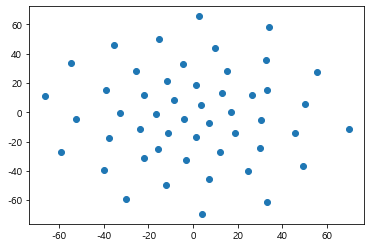

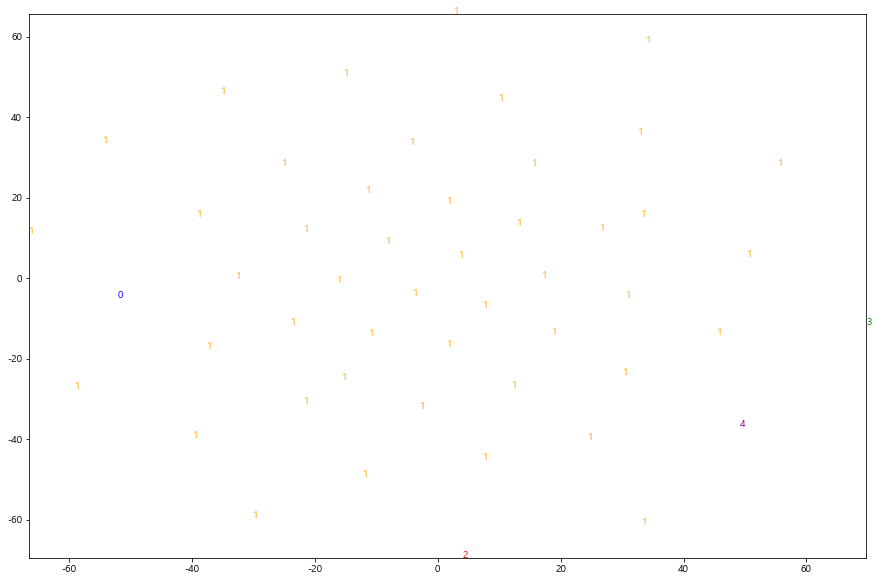

In [38]:
colors = {0:'blue', 1:'orange', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

### 5) 최적의 결과를 찾기 위한 방법

* 적절한 topic의 수는 perplexity 값을 이용해 찾음.
* **perplexity가 낮을 수록 좋은 모형**이나, 사람의 판단과 일치하지 않을 수 있음
<http://qpleple.com/perplexity-to-evaluate-topic-models/>
* 그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감
* 반복횟수는 5,000번 정도면 수렴

In [19]:
#50개의 topic으로 topic modeling 한 경우
lda.perplexity(review_cv)

583.6818103950467

In [20]:
#25개의 topic으로 topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 영화, 느낌, 관객, 얘기, 사람, 곤지암, 감동, 갈수록, 시간, 지루함
Topic #1: 가족, 영화, 설정, 저승, 감동, 점수, 부모님, 생각, 여자, 사람
Topic #2: 영화, 눈물, 생각, 진짜, 시나리오, 이건, 스토리, 인정, 감동, 시작
Topic #3: 연기, 차태현, 하정우, 진짜, 김동욱, 눈물, 어머니, 주지훈, 영화, 신파
Topic #4: 영화, 계속, 기자, 그냥, 연기, 정신, 배우, 정말, 알바, 상황
Topic #5: 영화, 아이, 사랑, 강철, 무슨, 보고, 마음, 관람, 평가, 아주
Topic #6: 영화, 인상, 가지, 유머, 일단, 제대로, 도대체, 재즈, 한국, 기대
Topic #7: 공포, 영화, 귀신, 연출, 형사, 외국, 거의, 코드, 명작, 흥행
Topic #8: 영화, 세계, 사람, 약간, 정말, 쓰레기, 그것, 실감, 감동, 구성
Topic #9: 영화, 소리, 추천, 부분, 나름, 아들, 순간, 다큐, 연기자, 영화인
Topic #10: 영화, 그냥, 집중, 드라마, 중국, 눈물, 감동, 생각, 감성, 만화
Topic #11: 윤계상, 연기, 마동석, 인간, 영화, 조선족, 다시, 영웅, 배우, 역할
Topic #12: 영화, 원작, 연기력, 생각, 요소, 올해, 실제, 감동, 효과, 초딩
Topic #13: 마블, 노스, 어벤져스, 히어로, 캐릭터, 시리즈, 이해, 이번, 예고편, 영화
Topic #14: 영화, 디즈니, 생각, 눈물, 동안, 자체, 자극, 박수, 정도, 취향
Topic #15: 영화, 범죄, 도시, 감동, 실화, 배우, 캐스팅, 재미, 이후, 신파
Topic #16: 광주, 택시, 역사, 시민, 우리, 위해, 국민, 민주화, 전두환, 진실
Topic #17: 영화, 정말, 교훈, 연기, 반성, 나라, 배우, 스릴, 사람, 보고
Topic #18: 영화, 수준, 관객, 최악, 감독, 전체, 개연, 천만, 배우, 역대
Topic #19: 영화, 감동, 정말, 연기, 코

556.1538487000632

In [21]:
#10개의 topic으로 topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 느낌, 공포영화, 한국, 별로, 관객, 공포, 정도, 전개, 초반, 영화관
Topic #1: 감동, 사람, 생각, 재미, 가족, 모두, 이야기, 보기, 대한, 지옥
Topic #2: 영화, 음악, 인생, 처음, 생각, 최악, 상영, 시작, 간만, 댓글
Topic #3: 연기, 배우, 진짜, 마동석, 윤계상, 신파, 장면, 눈물, 차태현, 액션
Topic #4: 정말, 그냥, 다시, 가슴, 택시, 몰입, 소재, 내내, 영화로, 알바
Topic #5: 보고, 내용, 눈물, 사랑, 마음, 수준, 현실, 아이, 기억, 한국영
Topic #6: 광주, 기대, 중간, 우리, 웹툰, 사실, 시민, 인간, 나름, 실망
Topic #7: 최고, 마지막, 평점, 감독, 역사, 송강호, 역시, 작품, 연출, 귀신
Topic #8: 스토리, 원작, 한번, 정도, 완전, 천만, 주인공, 지금, 가장, 약간
Topic #9: 시간, 마블, 하나, 이해, 부분, 추천, 노스, 다음, 결말, 영상



425.97775168150275

------

# 02. Topic Model Gensim

* Text mining 도구 in python
* Word2Vec으로 유명
* sklearn과 마찬가지로 다양한 텍스트 관련 도구 지원

## 1. 사전 작업

### 1) 20newsgroups 불러와 train data 만들기

In [22]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
#4가지 카테고리 선정

newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

In [23]:
## 필요한 library들을 import
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re

### 2) tokenize

In [24]:
## tokenize 함수 생성
def tokenize(text):
    min_length = 3 #최소 단어 크기
    
    # nltk의 tokenizer를 이용해서 word 추출한 후에 소문자로 변환
    words = map(lambda word: word.lower(), word_tokenize(text))
    #words = word_tokenize(text.lower()) #이렇게 해도 되는지 확인
    
    # stopwords 제외
    words = [word for word in words if word not in cachedStopWords]
    
    # portr stemmer 적용(어간 추출)
    tokens = (list(map(lambda token: PorterStemmer().stem(token),words)))
    #tokens = [PorterStemmer().stem(token) for token in words]  #이렇게 해도 되는지 확인
    
    # 알파벳으로 이루어진 단어들만 추출
    p = re.compile('[a-zA-Z]+');
    
    # 추출한 token에 최소 글자수 적용 
    filtered_tokens = list(filter (lambda token: p.match(token) and len(token) >= min_length,tokens))
    #filtered_tokens = [token for token in tokens if p.match(token) and len(token) >= min_length]   #이렇게 해도 되는지 확인
    return filtered_tokens

In [25]:
## train data에 있는 문서들 tokenize
docs = [tokenize(doc) for doc in newsgroups_train.data]

In [26]:
## 첫 번째 문서와 tokenize 된 내용 확인
print(newsgroups_train.data[0])
print(docs[0])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
['notic', 'save', 'model', 'map', 'plane', 'posit', 'care', 'file', 'reload', 'restart', 'given', 'default', 'posit', 'orient', 'save', 'file', 'positions/orient', 'preserv', 'anyon', 'know', 'inform', 'store', 'file', 'noth', 'explicitli', 'said', 'manual', 'save', 'textur', 'rule', 'file', 'like', 'abl', 'read', 'textur', 'rule', 'inform', 'anyon', 'format', 'file', 'file', 'format', 'a

## 2. Topic Modeling with Gensim

* Gensim으로 topic modeling을 하기 위해서는 Dictionary, Corpus, Model의 3단계를 거쳐야 함

### 4) Dictionary

In [27]:
#pip install gensim pip install pyldavis

from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
# tokenize 한 train data의 dictionary 만들기
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 19660
Number of unique words after removing rare and common words: 5628


### 5) Corpus(말뭉치)

In [28]:
## dictonary로 tokenize된 data를 corpus화 시켜주기
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 5628
Number of documents: 2034


### 6) Model

In [29]:
from gensim.models import LdaModel
# Set training parameters.
num_topics = 25
chunksize = 500 # size of the doc looked at every pass(=passage)
passes = 20 # number of passes through documents
iterations = 40
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 1min 9s


### 7) pyLDAvis를 이용한 시각화

In [30]:
#pip install pyldavis

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [31]:
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.198075 -0.001323       1        1  23.384157
21     0.109999  0.178197       2        1   9.385572
1     -0.174746  0.068731       3        1   7.759138
16    -0.077386  0.196044       4        1   7.678355
9      0.055853  0.263980       5        1   7.458118
10    -0.223813 -0.072990       6        1   5.906413
14    -0.081298  0.108896       7        1   5.862879
13    -0.231886 -0.094073       8        1   5.235446
8     -0.127231 -0.035978       9        1   3.874956
6     -0.070233 -0.019433      10        1   3.809468
23     0.001288 -0.042243      11        1   3.029643
20     0.113840  0.176973      12        1   2.873147
2      0.037669  0.075067      13        1   1.944516
19     0.016936 -0.087585      14        1   1.514659
11     0.018267 -0.088189      15        1   1.482655
3      0.058471 -0.034581      16        1   1.394021
17     0.123101 -0.071080      17        1   1.237556
24     0.156888  0.027013      18        1   1.200988
18    -0.034620 -0.007216      19        1   0.999738
12     0.093832  0.005730      20        1   0.885049
15    -0.055353 -0.046506      21        1   0.709795
5      0.094704 -0.155796      22        1   0.646503
22     0.169817 -0.082728      23        1   0.612293
4      0.137372 -0.156006      24        1   0.566138
7      0.086603 -0.104907      25        1   0.548797, topic_info=       Term         Freq        Total Category  logprob  loglift
130   would  1249.000000  1249.000000  Default  30.0000  30.0000
284    imag   829.000000   829.000000  Default  29.0000  29.0000
60      n't  1755.000000  1755.000000  Default  28.0000  28.0000
214   space   836.000000   836.000000  Default  27.0000  27.0000
6      file   505.000000   505.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
169  result     7.670681   147.063263  Topic25  -4.8487   2.2517
102     one    10.795227  1203.802002  Topic25  -4.5070   0.4911
516    make     7.886805   596.725769  Topic25  -4.8209   0.8789
209  person     6.276376   308.467102  Topic25  -5.0493   1.3104
742     lot     5.859458   254.056900  Topic25  -5.1180   1.4357

[1472 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4374      9  0.978197      abort
1965     15  0.841156    abraham
399       6  0.102768    absolut
399       9  0.842695    absolut
399      10  0.041107    absolut
...     ...       ...        ...
618      19  0.009280       year
3725     16  0.842577        yee
790       5  0.437727       york
790      21  0.562792       york
3239     23  0.810489  youngster

[3002 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 22, 2, 17, 10, 11, 15, 14, 9, 7, 24, 21, 3, 20, 12, 4, 18, 25, 19, 13, 16, 6, 23, 5, 8])

----

# 03. Pandas_Topic Model
* '\# 01. Topic Model Korean'과 csv 데이터를 불러오는 코드만 다름
* 해당 코드로 리뷰 수가 14967개로 더 많이 출력되기 때문에 뒷쪽의 결과들도 다르게 나옴

## 다음 영화 리뷰로 text classification 진행

### 1) 다음무비에서 추출한 영화 리뷰 불러오기

In [32]:
import pandas as pd

movie = pd.read_csv('movie_data_new.csv', header = None) # header를 None으로 설정해 header가 없음을 알림

print('리뷰 수:', len(movie))
print('리뷰영화:', set(movie.iloc[:,2])) #전체행에 대해 3번째 열만 인덱싱
# pandas dataframe에 접근하기 위해서는 ix를 사용.(x) -> ix는 없어짐. 위치와 값 둘다 접근 가능한 iloc 사용.

리뷰 수: 14967
리뷰영화: {'택시운전사', '코코', '곤지암', '인피니티 워', '범죄도시', '라라랜드', '신과함께'}


In [33]:
movie[:10]

,0,1,2
0,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,인피니티 워
1,충격 결말,9,인피니티 워
2,응집력,8,인피니티 워
3,개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고...,8,인피니티 워
4,내가졸라이상하네,4,인피니티 워
5,대박,10,인피니티 워
6,정말 지루할틈없이 넘잘만들었다 역시 대단하다,9,인피니티 워
7,역시 어벤져스!!,9,인피니티 워
8,마지막에 누구한테 연락한거지? 궁금,9,인피니티 워
9,다음 편이 궁굼해지네요^^,10,인피니티 워


In [34]:
# 전체행에 대해 1번째 열만 인덱싱 - 리뷰들만 가져옴
text = movie.iloc[:,0]
text[:10]

0                       헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...
1                                                충격 결말
2                                                  응집력
3    개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고...
4                                             내가졸라이상하네
5                                                   대박
6                             정말 지루할틈없이 넘잘만들었다 역시 대단하다
7                                            역시 어벤져스!!
8                                  마지막에 누구한테 연락한거지? 궁금
9                                       다음 편이 궁굼해지네요^^
Name: 0, dtype: object

### 2) 한글 처리를 위해서는 konlpy가 필요

In [35]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [36]:
review_cv.shape

(14967, 1000)

### 3) LDA로 Topic Modeling 수행

#### 10개의 topic으로 진행

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [40]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (14967, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [41]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [42]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 영화, 것, 돈, 중간, 감독, 처음, 끝, 소재, 이건, 연출
Topic #1: 스토리, 그냥, 내용, 볼, 좀, 느낌, 부분, 임, 함, 도
Topic #2: 감동, 사람, 눈물, 원작, 왜, 가족, 저, 웹툰, 나, 생각
Topic #3: 광주, 그, 꼭, 다시, 역사, 수, 가슴, 우리, 송강호, 한번
Topic #4: 영화, 생각, 더, 때, 만, 한국영, 이상, 이, 우리나라, 영화로
Topic #5: 정말, 최고, 재미, 시간, 안, 하나, 별로, 역시, 추천, 중
Topic #6: 연기, 진짜, 배우, 마동석, 윤계상, 신파, 액션, 완전, 대박, 굿
Topic #7: 보고, 기대, 편, 마블, 또, 노스, 다음, 개, 결말, 캐릭터
Topic #8: 점, 정도, 이, 평점, 내, 한국, 뭐, 공포영화, 영화, 수준
Topic #9: 마지막, 장면, 음악, 인생, 사랑, 영화, 이야기, 번, 현실, 눈



#### 한 글자로 구성된 명사들은 의미파악이 어려우므로 삭제

In [45]:
twitter_tag.nouns(text[1])

['충격', '결말']

In [46]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [47]:
tokenizer(text[1])

['충격', '결말']

In [48]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

### 4) Topic 수 다양화

#### 50개의 topic들을 대상으로 clustering을 수행해서 topic들을 잘 묶을 수 있는지 확인

In [49]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 영화, 상영, 느낌, 자극, 갈수록, 스크린, 취향, 노력, 분위기, 감동
Topic #1: 마블, 노스, 이상, 히어로, 그래픽, 얘기, 영화, 인피니티, 점도, 폭력
Topic #2: 송강호, 위해, 국민, 대한민국, 가슴, 엔딩, 희생, 영웅, 보시, 추격
Topic #3: 영화, 지금, 추천, 쓰레기, 누구, 더욱, 시도, 정말, 강력, 블레어
Topic #4: 영화, 관객, 뮤지컬, 강추, 사람, 출연, 해도, 그게, 재즈, 테러
Topic #5: 진짜, 영화, 발전, 점수, 역시, 눈물, 각색, 최고, 간만, 처럼
Topic #6: 한국, 사실, 대사, 중국, 차라리, 상황, 시나리오, 가지, 스케일, 영화
Topic #7: 영화, 완전, 조폭, 경찰, 다가, 눈물, 처음, 코미디, 감동, 사람
Topic #8: 액션, 웃음, 긴장감, 영화, 영화인, 형사, 스릴, 코믹, 연기, 과거
Topic #9: 오늘, 범죄, 도시, 완성, 연기자, 꿀잼, 배우, 반성, 박수, 연기
Topic #10: 평점, 반전, 얼마나, 영화, 등장, 리얼, 짜증, 감동, 훌쩍, 현재
Topic #11: 영화, 최고, 최악, 아들, 올해, 도대체, 심장, 정말, 깡패, 불구
Topic #12: 눈물, 영화, 설정, 무슨, 저승, 신파극, 효과, 나중, 애니, 감상
Topic #13: 대한, 영화로, 인간, 영화, 이해, 오락, 요즘, 반드시, 감동, 감탄
Topic #14: 장면, 스토리, 전개, 집중, 약간, 영화, 내용, 한국영, 시간, 세계관
Topic #15: 정도, 영화, 여운, 시간, 실화, 현실, 처음, 감동, 관객수, 바탕
Topic #16: 가족, 이야기, 기억, 보기, 노래, 디즈니, 코코, 픽사, 겨울왕국, 전형
Topic #17: 영화, 가장, 의미, 사람, 누가, 다소, 살짝, 타임, 라라, 랜드
Topic #18: 원작, 웹툰, 수준, 이제, 김동욱, 댓글, 진심, 기술, 인정, 신파
Topic #19: 영화, 판타지, 마블리, 

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [0 2 2 4 0 2 2 4 2 2 0 4 0 0 2 0 2 4 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 2 1 4 0
 3 2 2 2 0 2 0 0 0 2 2 0 4]


#### T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([-26.228304 ,  -9.995025 ,  46.649403 ,  -1.6325508, -27.5668   ,
        81.689156 , -35.28797  ,   2.6156175, -11.304313 ,   4.0795746,
       -55.775806 ,  21.656673 , -19.19056  ,  23.783792 , -67.14459  ,
       -86.62832  , -99.21543  , -13.120061 , -67.16767  ,  -2.9208426,
         6.628545 ,  12.393151 , -27.701046 ,  56.70328  ,  -7.2939367,
       -27.095646 ,  16.027466 , -55.12867  , -78.64096  ,  55.112484 ,
        25.607193 ,  48.402256 ,  29.979427 , -47.492447 , -45.201675 ,
       -18.965967 ,  28.500086 ,  89.17913  ,  73.051025 , -37.71155  ,
        44.51035  ,  -8.994303 , -10.97403  ,   7.922424 , -11.326307 ,
        29.982994 , -32.869816 , -64.008064 ,   9.55746  , -36.275063 ],
      dtype=float32)

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

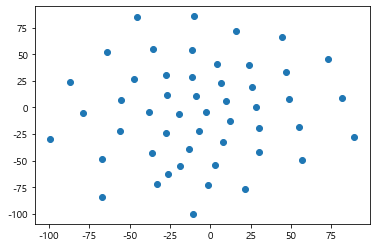

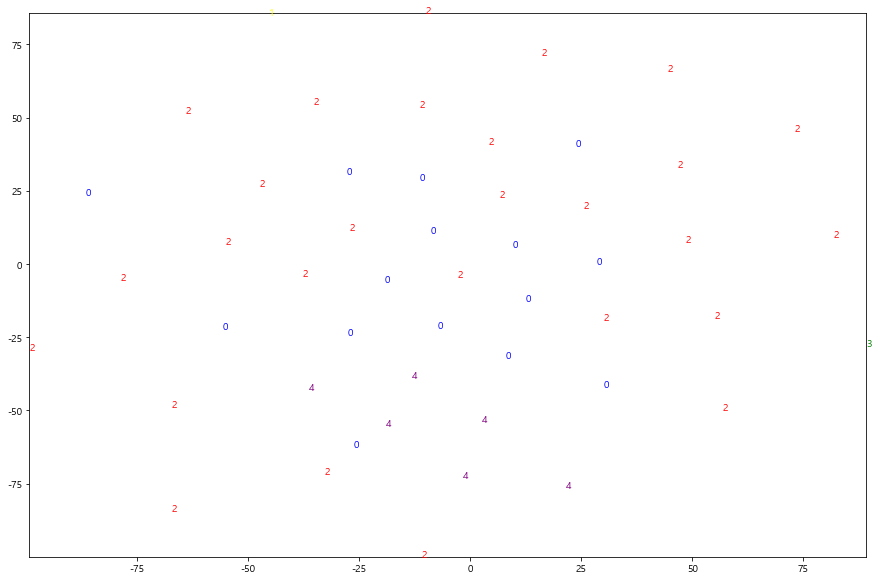

In [53]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음


### 5) 최적의 결과를 찾기 위한 방법
* perplexity가 낮을수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음

In [54]:
# 50개의 topic으로 topic modeling 수행한 결과
lda.perplexity(review_cv)

579.2360029969906

In [55]:
# 25개의 topic으로 topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 영화, 아주, 자체, 감동, 노잼, 감성, 자극, 갈수록, 취향, 어른
Topic #1: 마블, 노스, 다음, 영화, 어벤져스, 히어로, 시리즈, 토르, 스톤, 인상
Topic #2: 광주, 택시, 송강호, 시민, 기자, 운전사, 대한민국, 희생, 아픔, 영화
Topic #3: 영화, 음악, 쓰레기, 정말, 누구, 스토리, 뮤지컬, 여운, 마음, 연기
Topic #4: 영화, 관객, 느낌, 사람, 스토리, 진짜, 다만, 해도, 감동, 뮤지컬
Topic #5: 영화, 진짜, 감동, 지루함, 눈물, 연기, 최고, 점수, 캐스팅, 역시
Topic #6: 영화, 한국, 신파, 장면, 중국, 차라리, 상황, 가지, 시나리오, 극장
Topic #7: 영화, 중간, 완전, 대사, 조폭, 경찰, 사람, 결말, 보고, 형사
Topic #8: 영화, 조선족, 긴장감, 정말, 연기, 눈물, 다큐, 스릴, 동생, 분노
Topic #9: 윤계상, 연기, 배우, 영화, 오늘, 범죄, 마동석, 도시, 연기자, 꿀잼
Topic #10: 평점, 영화, 수준, 알바, 생각, 강철, 대해, 초반, 감동, 영화관
Topic #11: 영화, 사랑, 인생, 최악, 최고, 올해, 악역, 자신, 마동석, 윤계상
Topic #12: 영화, 설정, 감동, 무슨, 신파극, 눈물, 순간, 지옥, 개연, 모두
Topic #13: 영화, 소리, 정도, 연기, 이해, 감동, 인간, 안보, 출연, 기대
Topic #14: 영화, 집중, 약간, 생각, 엄마, 스토리, 감동, 한국영, 추천, 초딩
Topic #15: 영화, 실화, 라면, 사람, 남자, 정도, 시간, 현실, 감동, 매력
Topic #16: 가족, 기억, 영화, 영상, 노래, 디즈니, 명작, 코코, 역대, 이야기
Topic #17: 영화, 가장, 사람, 의미, 다소, 생각, 충격, 선택, 내용, 사랑
Topic #18: 영화, 연기, 차태현, 원작, 웹툰, 하정우, 김동욱, 신파, 주지훈, 배우
Topic #19: 영화, 판타지, 감동, 

553.3722509176054

In [56]:
# 10개의 topic으로 topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 감동, 재미, 기대, 가족, 스토리, 내용, 별로, 웹툰, 추천, 억지
Topic #1: 마블, 사랑, 스토리, 작품, 노스, 이야기, 다음, 모두, 결말, 영상
Topic #2: 광주, 역사, 가슴, 우리, 송강호, 택시, 기억, 지금, 사실, 시민
Topic #3: 영화, 원작, 음악, 스토리, 여운, 영화로, 마음, 뮤지컬, 상영, 쓰레기
Topic #4: 생각, 사람, 그냥, 평점, 보고, 관객, 천만, 이영화, 알바, 지옥
Topic #5: 진짜, 최고, 처음, 역시, 부분, 조금, 내용, 한국영, 이건, 영화
Topic #6: 장면, 정도, 신파, 한국, 감독, 공포영화, 공포, 때문, 연출, 수준
Topic #7: 시간, 보고, 중간, 영화, 다시, 한번, 인생, 완전, 이해, 최악
Topic #8: 정말, 눈물, 마지막, 차태현, 대박, 아이, 하정우, 엄마, 초반, 계속
Topic #9: 연기, 배우, 마동석, 윤계상, 액션, 연기력, 조연, 김동욱, 이제, 오늘



409.1952388313528